In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from api.functions import *
from joblib import Parallel, delayed
from wordcloud import WordCloud
from api.setting import Settings

In [3]:
df = pd.read_csv("../data/dataset.csv")
df.head()

,TweetID,text,annotation
0,569957017655226369,@OutworldDOTA2 i'm very entertained that all i...,none
1,576433212156563456,Indian women want to watch a graphical rape do...,sexism
2,603664815454875648,RT @cage_rusty: #BlameOneNotAll but apparently...,none
3,598769509248335873,Sex is fun. Money is rad. People are weird.,none
4,565029767708033024,@dylanw i didn't come at this looking to attac...,none


In [4]:
X = df['text']
Y = df['annotation']

In [ ]:
X.head()

In [ ]:
Y.value_counts()

In [ ]:
norm_count_unique = Y.value_counts(normalize=True)
norm_count_unique

In [ ]:
plt.pie(norm_count_unique.values,labels=norm_count_unique.index,autopct='%1.1f%%')
plt.show()

In [ ]:
text = X
text.str.len().describe()
## lunghezza dei tweet è
# generalmente compresa tra 40 e 140 caratteri

In [ ]:
plt.boxplot(text.str.len())

In [ ]:
text.str.split().map(lambda x: len(x)).hist()
# i tweet hanno un intorno tra le 5 e le 22 parole

In [ ]:
box = text.str.split().\
   apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x))

plt.boxplot(box)
plt.show()

In [ ]:
box.describe()

## la media delle lunghezze delle parole è attorno al 5.

In [4]:
def visualizeWordCloudLabel(data,label):
    words = ''
    for msg in data[data['annotation'] == label]['text']:
        msg = msg.lower()
        words += msg + ' '
    wordcloud = WordCloud(width=600, height=400).generate(words)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    #return words


def visualizeWordCloud(data):
    words = ''
    for msg in data['text']:
        msg = msg.lower()
        words += msg + ' '
    wordcloud = WordCloud(width=600, height=400).generate(words)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

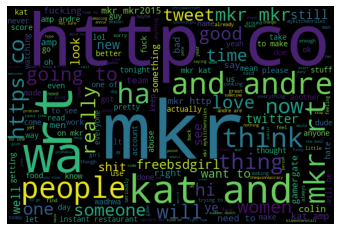

In [5]:
visualizeWordCloudLabel(df,'none')

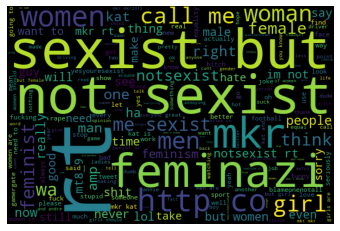

In [6]:
visualizeWordCloudLabel(df,'sexism')


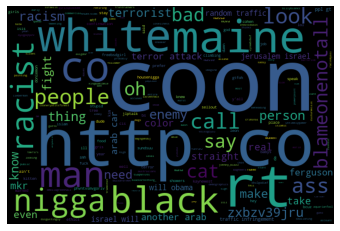

In [7]:
visualizeWordCloudLabel(df,'racism')


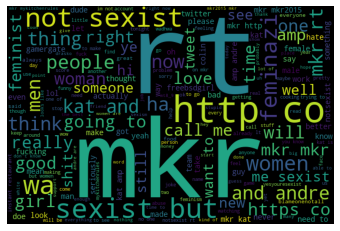

In [8]:
visualizeWordCloud(df)



In [5]:
settings = Settings()

In [6]:
X = pd.Series(Parallel(n_jobs=-1, verbose=5, backend="multiprocessing")(delayed(clean_tweet_settings)(x, settings) for x in X))
visualizeWordCloud(df)

[Parallel(n_jobs=-1)]: Using backend MultiprocessingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done 480 tasks      | elapsed:   17.3s
[Parallel(n_jobs=-1)]: Done 876 tasks      | elapsed:   30.6s
[Parallel(n_jobs=-1)]: Done 1344 tasks      | elapsed:   47.2s
[Parallel(n_jobs=-1)]: Done 1884 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 2496 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 3180 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 3936 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 4764 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 5664 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 6636 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 7680 task

NameError: name 'visualizeWordCloud' is not defined

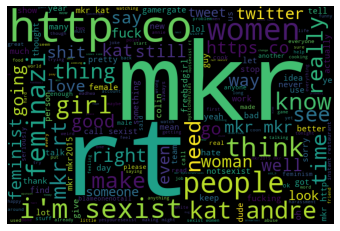

In [7]:
def visualizeWordCloud(data):
    words = ''
    for msg in data:
        msg = msg.lower()
        words += msg + ' '
    wordcloud = WordCloud(width=600, height=400).generate(words)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

visualizeWordCloud(X)



In [9]:
frequent_dict = most_frequent_words(X)
print(len(frequent_dict)) # 31953 distinct words




[('.', 11636), (',', 4980), ('I', 3269), (':', 2373), ('RT', 2355), ('"', 2171), ('?', 2122), ('!', 2094), ('#MKR', 1925), ('#mkr', 1786), ('...', 1137), ("I'm", 1069), ('sexist', 980), ('like', 772), ('Kat', 695), ('women', 667), ('…', 655), ('&', 569), ('get', 505), ('people', 493), ('think', 456), ('/', 431), ('-', 418), ('*', 390), ('know', 385), ('would', 374), ("'", 373), ('The', 364), ('Andre', 363), ('really', 333), ('girls', 323), ('feminazi', 307), ('going', 306), ('time', 305), ("can't", 298), ('see', 282), ('make', 281), ('go', 278), ('good', 270), ("It's", 261), ('This', 258), ('need', 248), ('You', 237), (')', 232), ("i'm", 228), ('still', 227), ('even', 223), ('(', 223), ('right', 219), ('But', 214), (':)', 210), ('woman', 210), ('If', 210), ('female', 210), ('got', 205), ('way', 198), ('much', 198), ('never', 196), ('pretty', 192), ('Not', 189), ("that's", 188), ('A', 187), (':P', 186), ('shit', 184), ('No', 182), ('sure', 181), ("I've", 179), ('say', 178), ('So', 176),